<a href="https://colab.research.google.com/github/Mjcherono/Titanic-using-KNN-Spambase-Using-NaiveBayes/blob/main/Titanic-survivors-prediction-using-KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Defining the Question

####a. Specifying the Question


*   On this project, I will be using the Titanic train and test datasets and KNN Model to make predictions on the Survivors of the incidence and also try identifying influencial features in the dataset.




#### b.Defining the metric for success.


*   Aiming to identify the features that influenced the number of Survivors
*   Using titanic dataset I also aim at training my KNN model and even doing some parameter tuning to achieve a relatively high accuracy on the classification report after doing a prediction.



####c.Recording the Experimental Design


*   Loading necessary Libraries and Dataset.
*   Doing some data preprocessing for my data to make it efficient for my analysis and modelling.
*   Do Exploratory Data Analysis to understand my data better.
*   Finally;

 Train my base model.

 Hyperparameter Tune my model.

 Train my tuned model again in splits of 30/70 and 40/60
*   Make Predictions and check on classification report to see which split performed better.












####d.Data .


*   The titanic dataset came in two sets; a train set with 889 columns and 9 rows used for training the model and a test set with 417 rows and 7 columns used to evaluate the model.
*   The important feature in the dataset is the Survivors column which will be the label during our training bit and is the missing one in the test set so we will be predicting it.



####e.Appropriateness of Data


*   All the provided features are relevant for our study appart from a few ; the name and ID which don't contribute much to survival.
*   The nuber of entries are close to 900 which is sufficient data to train a model



###Importing Data

In [88]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
#importing data
titanic_train = pd.read_csv('/content/train (5).csv')
titanic_test = pd.read_csv('/content/test (1).csv')

In [90]:
#checking on data
print(titanic_train.head(5))
print(titanic_test.head(5))


   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [91]:
#checking on tails
print(titanic_train.tail(5))
print(titanic_test.tail(5))

     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]
     PassengerId  Pclass                          Name  ...      Fare  Cabin  Embarked
413         1305       3            Spector, Mr. Woolf  ...    8.0500    NaN         S
414         1306       1  Oliva y Ocana, Dona. Fermina  ...  108.9000   C105         C
415         1307       3  Saether, Mr. Simon Sivertsen  ...    7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...    8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...   22.3583    NaN         C

[5 rows x 11 columns]


In [92]:
#data types
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [93]:
titanic_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
#description
print(titanic_train.describe())
print(titanic_test.describe())


       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.3923

In [95]:
titanic_train.shape


(891, 12)

In [96]:
#
titanic_test.shape


(418, 11)

###Data Preprocessing.

####i.Completeness
*   Ensuring that there were no null values in the dataset.



In [97]:
#checking for null values titanic dataset
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [98]:
#dealing with null values
#do away with the cabin column it has too many null values
titanic_train.drop('Cabin',axis=1, inplace=True)
titanic_test.drop('Cabin',axis=1, inplace=True)

In [99]:
titanic_train = titanic_train.dropna(axis=0, subset=['Embarked'])
titanic_test = titanic_test.dropna(axis=0, subset=['Fare'])


In [100]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


In [101]:
#Substituting missing values at age column with median age median

titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(),inplace=True)

In [102]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


####ii. Consistency.
*   Checking for any duplicated values and dropping them if found but the dataset didn't have any.



In [103]:
#checking for duplicates
titanic_train.duplicated().sum()
titanic_test.duplicated().sum()


0

In [104]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

####iii. Relevance/Valididty.
*   Ensuring that the features available for to train the model are relevant. I dropped the PassengerId,Name and Ticket columns.



In [105]:
#Drop irrelevant columns
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [106]:
titanic_train.shape

(889, 8)

In [107]:
titanic_test.shape

(417, 7)

In [172]:
titanic_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


In [108]:
titanic_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [109]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


####iv.Accuracy
*   Checking that the column entries were correct.


In [110]:
titanic_train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [111]:
titanic_train.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [112]:
titanic_train.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [113]:
titanic_train.Age.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [114]:
titanic_train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [115]:
titanic_train.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [116]:
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


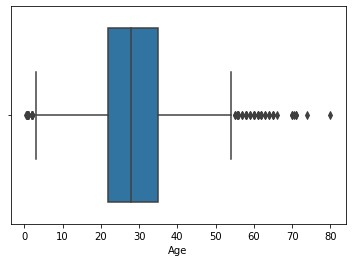

In [117]:
#using a boxplot check for outliers
sns.boxplot(titanic_train['Age'])

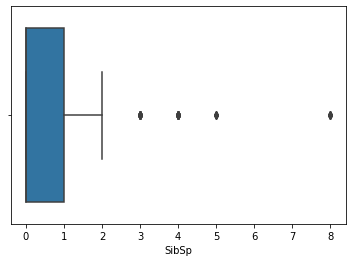

In [118]:
sns.boxplot(x=titanic_train['SibSp'])


In [119]:
#Doing away with outliers
#df = titanic_train[['Age','SibSp']]
#q3 = df.quantile(0.75)
#q1 = df.quantile(0.25)
#iqr = q3-q1
#iqr

#df = df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]
#titanic_train[['Age','SibSp']] = df


In [120]:
#sns.boxplot(titanic_train['Age'])

In [121]:
#using a boxplot check for outliers in SibSp
#sns.boxplot(titanic_train['SibSp'])

In [122]:
#q1 = titanic_train.quantile(0.25)
#q3 = titanic_train.quantile(0.75)
#iqr = q3 - q1

In [123]:
#outliers
#Q3 = df.quantile(0.75)
#Q1 = df.quantile(0.25)
#IQR = Q3-Q1
#IQR

#df.df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
#df.shape

###Exploratory Data Analysis

####Univariate Analysis.

In [124]:
#distplotgs
#barplots
#histograms
#piecharts
#linecharts

In [125]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Age

In [126]:
titanic_train.Age.describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


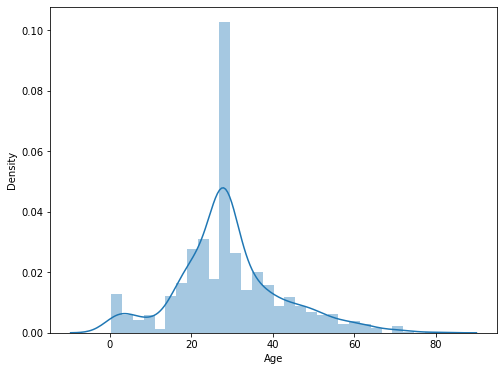

In [127]:
#Distribution of age
fig,axes = plt.subplots(figsize=(8,6))
sns.distplot(titanic_train.Age, hist=True,kde =True, label = 'Age')

P Class

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


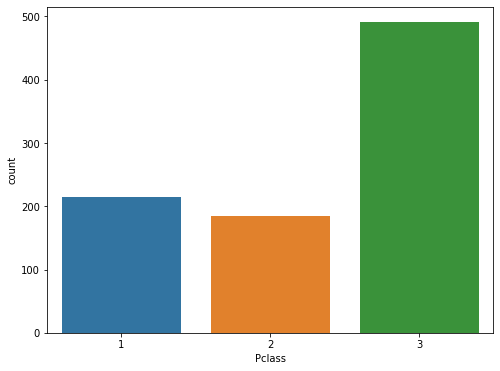

In [128]:
#countplot of Passenger class

fig,axes = plt.subplots(figsize=(8,6))
sns.countplot(titanic_train['Pclass'])


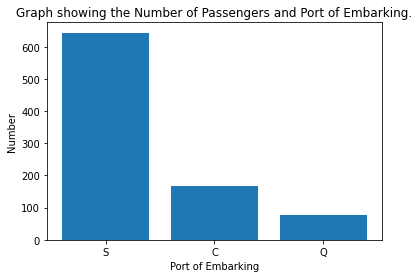

In [129]:
#bar grouph that shows the number of Embarked

x=titanic_train.Embarked.unique()
plt.bar(x , titanic_train['Embarked'].value_counts())
plt.ylabel("Number")
plt.xlabel("Port of Embarking")
plt.title("Graph showing the Number of Passengers and Port of Embarking.")
plt.show()

######C = Cherbourg, Q = Queenstown, S = Southampton

Survived

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


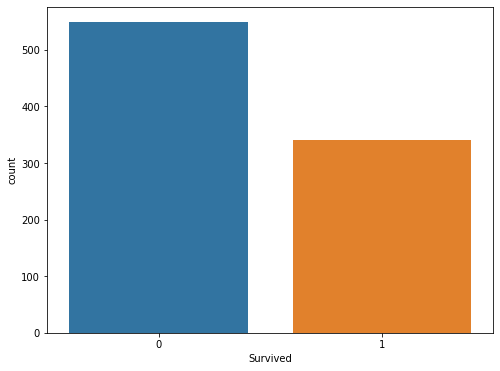

In [130]:
fig,axes = plt.subplots(figsize=(8,6))
sns.countplot('Survived',data=titanic_train )


Number of survivers by Sex

<BarContainer object of 2 artists>

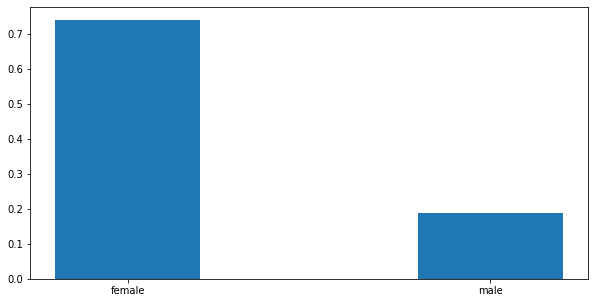

In [131]:
df=titanic_train[['Survived','Sex']].groupby(['Sex']).mean().reset_index()
df
#plotting a bar graph to represent that
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df.Sex,df.Survived,width = 0.4)


####Bivariate Analysis

#####Multicollinearity

In [132]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [133]:
#Labe Encoding features 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_train['Sex'] = le.fit_transform(titanic_train['Sex'])
titanic_train['Embarked'] = le.fit_transform(titanic_train['Embarked'])

titanic_test['Sex'] = le.fit_transform(titanic_test['Sex'])
titanic_test['Embarked'] = le.fit_transform(titanic_test['Embarked'])


In [134]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

correlations

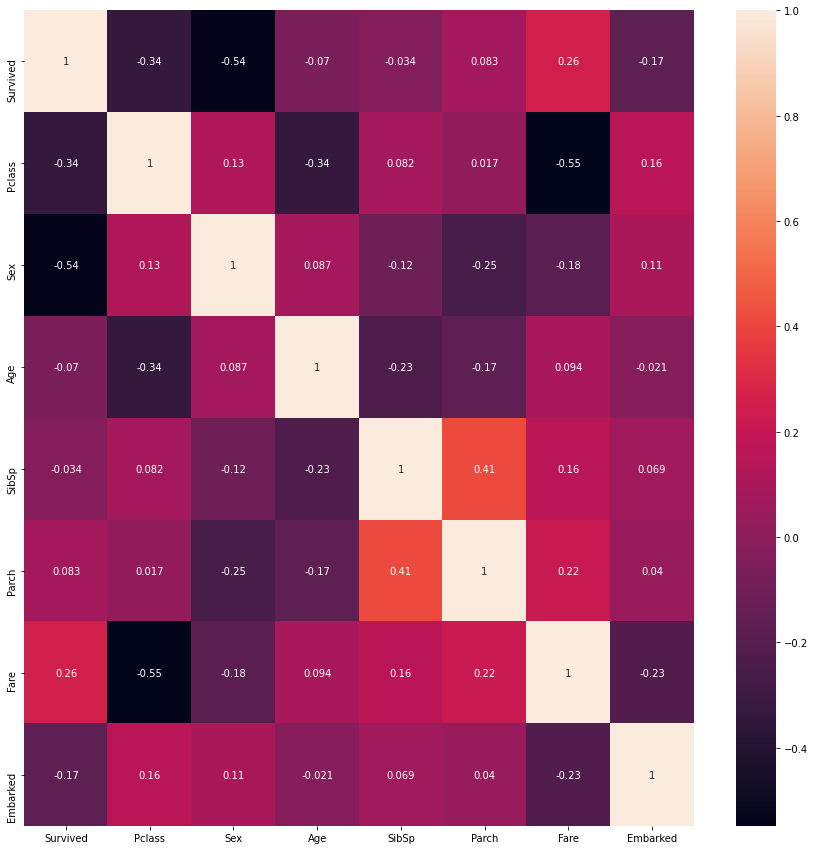

In [135]:
#checking for correlation btwn features

plt.subplots(figsize=(15,15))
sns.heatmap(titanic_train.corr(),annot=True)


From the heat map no features in the dataset have really high correlation.

In [136]:
#chedcking for highly correlated values
corr_matrix = titanic_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [137]:
# Drop features 
titanic_train.drop(titanic_train[to_drop], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


 Above were just a few lines of code to identify and get rid of any available highly correlated features.Apparently the dataset remained the same.

In [138]:
#scatter
#line chart
#stacked bar chart
#bargraph

In [139]:
titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


Taking into account the bivariate Analysis, For feature survived, 0 are those who didn't survive and 1 the survivors.

Survivors in different Passenger Classes

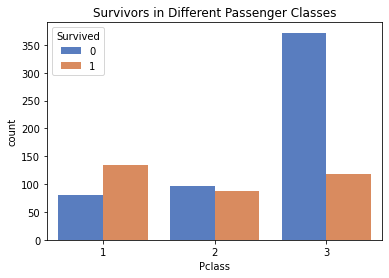

In [140]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_train, palette='muted')
plt.title('Survivors in Different Passenger Classes')
plt.show()

Survivors to Different Destinataions.

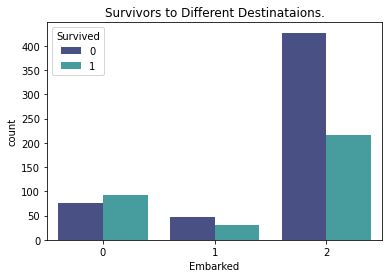

In [162]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_train, palette='mako')
plt.title('Survivors to Different Destinataions.')
plt.show()

Condition of Survivors in relation to Gender.

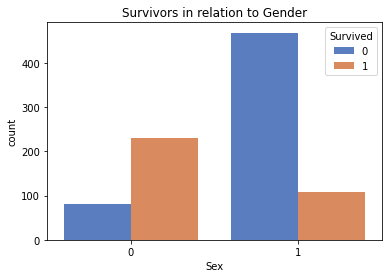

In [163]:
sns.countplot(x='Sex', hue='Survived', data=titanic_train, palette='muted')
plt.title('Survivors in relation to Gender')
plt.show()

Relationship of Feature Fare to Survived

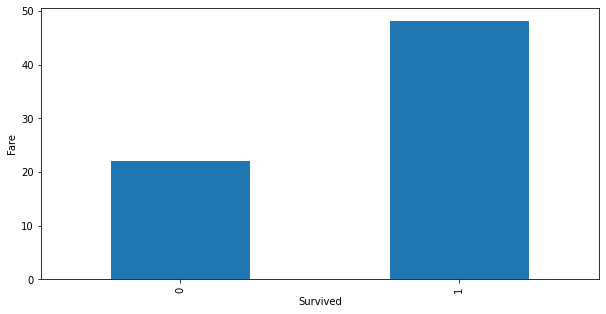

In [143]:
df = titanic_train.groupby(['Survived'])['Fare'].mean()
plt.figure(figsize=(10, 5))
plt.ylabel('Fare')
plt.xlabel('Survived')
df.plot.bar()

Mean of fare per Class

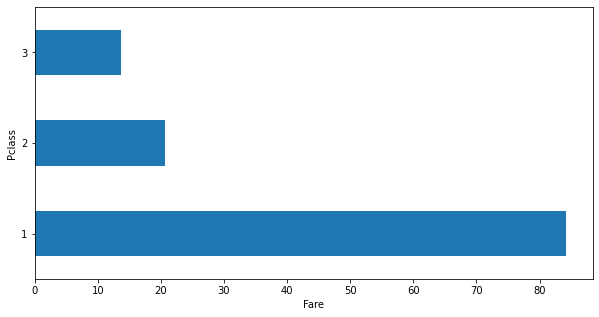

In [144]:
df1 = titanic_train.groupby(['Pclass'])['Fare'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('Fare')
df1.plot.barh()

Age and whether they survived or not


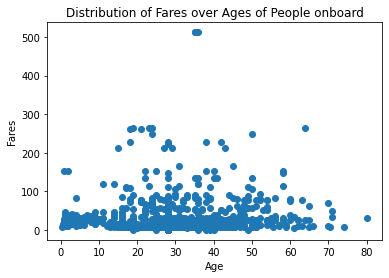

In [145]:
plt.scatter(titanic_train.Age,titanic_train.Fare)
plt.ylabel('Fares')
plt.xlabel('Age')
plt.title('Distribution of Fares over Ages of People onboard')
plt.show()

Fares to Embarking Ports

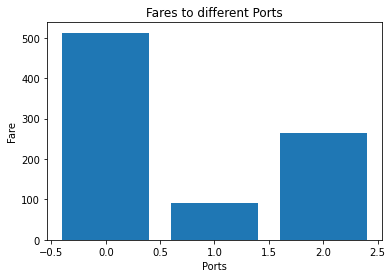

In [146]:
plt.bar(titanic_train.Embarked,titanic_train.Fare)
plt.ylabel('Fare')
plt.xlabel('Ports')
plt.title('Fares to different Ports')
plt.show()

###Implementing Soution.

####K Nearest Neighbors.



In [147]:
#Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV

In [148]:
#Splitting the dataset to features and labels
X = titanic_train.drop(['Survived'],axis=1).values
y = titanic_train['Survived'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training the model
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#Making predictions
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [149]:
##Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85 20]
 [31 42]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



My base KNN model offers an accuracy of 71% which is fairly not bad but hoping this improves after some parameter tuning.

Using a hyper-parameter tuned KNN.

80-20

In [150]:
#Splitting the dataset to features and labels
X = titanic_train.drop(['Survived'],axis=1).values
y = titanic_train['Survived'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [151]:
#List the hyperparameters
leaf_size = list(range(1, 50))
n_neighbors= list(range(1, 30))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors , p=p)

#new knn objects
classifier_2 = KNeighborsClassifier()
clf = GridSearchCV(classifier_2, hyperparameters, cv=10)

#fit model
clf.fit(X_train, y_train)

#best params
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 28, 'p': 1}

Gave hyperparameters; leaf_size a range between 1-50, n_neighbors a range of 1-50 and a p value of either 1 and 2 and let the grid search find the best.

In [152]:
#making y predictions
y_pred = clf.predict(X_test)
print(y_pred)

#model score
print(clf.score(X_test,y_test))

#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
#print(accuracy.score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1]
0.7303370786516854
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.72      0.56      0.63        73

    accuracy                           0.73       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.73      0.73      0.72       178



Upon tuning my KNN model, best parameters were leaf size =1,n_neighbors as 28 and a pvalue of 1 with a split of 20/80 my accuracy slightly increased to 73% which is a relatively fair improvement.

70-30

In [153]:
#Splitting the dataset to features and labels
X = titanic_train.drop(['Survived'],axis=1).values
y = titanic_train['Survived'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [154]:
#List the hyperparameters
leaf_size = list(range(1, 50))
n_neighbors= list(range(1, 30))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors , p=p)

#new knn objects
classifier_2 = KNeighborsClassifier()
clf = GridSearchCV(classifier_2, hyperparameters, cv=10)

#fit model
clf.fit(X_train, y_train)

#best params
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 10, 'p': 1}

In [155]:
#making y predictions
y_pred = clf.predict(X_test)
print(y_pred)

#model score
print(clf.score(X_test,y_test))

#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1]
0.7677902621722846
[[138  19]
 [ 43  67]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       157
           1       0.78      0.61      0.68       110

    accuracy                           0.77       267
   macro avg       0.77      0.74      0.75       267
weighted avg       0.77      0.77      0.76       267



On my second try with a 70/30 split gave me a better accuracy now at 77%.

60-40

In [164]:
#Splitting the dataset to features and labels
X = titanic_train.drop(['Survived'],axis=1).values
y = titanic_train['Survived'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [165]:
#List the hyperparameters
leaf_size = list(range(1, 50))
n_neighbors= list(range(1, 30))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors , p=p)

#new knn objects
classifier_2 = KNeighborsClassifier()
clf = GridSearchCV(classifier_2, hyperparameters, cv=10)

#fit model
clf.fit(X_train, y_train)

#best params
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 16, 'p': 1}

In [166]:
#making y predictions
y_pred = clf.predict(X_test)
print(y_pred)

#model score
print(clf.score(X_test,y_test))

#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
0.7724719101123596
[[196  20]
 [ 61  79]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       216
           1       0.80      0.56      0.66       140

    accuracy                           0.77       356
   macro avg     

Trying it out with a 60/40 split the accuracy remained the same.

###Challenging the solution
*   KNN was a faily okay model to perform this prediction but I think a logistic model would have done better since it's a classification model that separates labels that only have 2 sides of it. In this case 0 or 1.



###Conclusion


*  KNN model performs best when the base model is parameter tuned since it improves the accuracy.
*   We achieve a mximum accuracy of 77% which was relatively fair and 83% for percentage of correct positive predictions.


